# 1. HAFTA DATA PROCRESSİNG

In [2]:
import pandas as pd
import numpy as np

In [3]:
financial = pd.read_csv("murat hoca.csv")

In [4]:
financial

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1000095,45,CASH_IN,277490.78,C717622073,6710082.17,6987572.95,C1206457238,497024.57,219533.79,0,0
1000096,45,CASH_IN,80055.73,C1629214506,6987572.95,7067628.68,C362180320,8565923.68,8485867.95,0,0
1000097,45,CASH_IN,174911.66,C1880367930,7067628.68,7242540.34,C1747080965,513857.26,338945.60,0,0
1000098,45,CASH_IN,58288.75,C1783404602,7242540.34,7300829.09,C1479797936,104782.69,46493.94,0,0


In [5]:

display(financial.head())

display(financial.tail())

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1000095,45,CASH_IN,277490.78,C717622073,6710082.17,6987572.95,C1206457238,497024.57,219533.79,0,0
1000096,45,CASH_IN,80055.73,C1629214506,6987572.95,7067628.68,C362180320,8565923.68,8485867.95,0,0
1000097,45,CASH_IN,174911.66,C1880367930,7067628.68,7242540.34,C1747080965,513857.26,338945.60,0,0
1000098,45,CASH_IN,58288.75,C1783404602,7242540.34,7300829.09,C1479797936,104782.69,46493.94,0,0
1000099,45,CASH_IN,196957.63,C1892272521,7300829.09,7497786.72,C1499695917,963567.67,766610.04,0,0


In [6]:
financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000100 entries, 0 to 1000099
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1000100 non-null  int64  
 1   type            1000100 non-null  object 
 2   amount          1000100 non-null  float64
 3   nameOrig        1000100 non-null  object 
 4   oldbalanceOrg   1000100 non-null  float64
 5   newbalanceOrig  1000100 non-null  float64
 6   nameDest        1000100 non-null  object 
 7   oldbalanceDest  1000100 non-null  float64
 8   newbalanceDest  1000100 non-null  float64
 9   isFraud         1000100 non-null  int64  
 10  isFlaggedFraud  1000100 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 83.9+ MB


In [7]:
financial.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.000100e+06,1.000100e+06,1.000100e+06,1.000100e+06,1.000100e+06,1.000100e+06,1.000100e+06,1000100.0
mean,2.515837e+01,1.602455e+05,8.777607e+05,8.984415e+05,9.860755e+05,1.125653e+06,5.349465e-04,0.0
std,1.265302e+01,2.592488e+05,2.982381e+06,3.019291e+06,2.305399e+06,2.426550e+06,2.312273e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.400000e+01,1.275990e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.953731e+04,1.596150e+04,0.000000e+00,1.349605e+05,2.301210e+05,0.000000e+00,0.0
75%,3.800000e+01,2.166020e+05,1.397961e+05,1.798342e+05,9.268292e+05,1.167926e+06,0.000000e+00,0.0
max,4.500000e+01,1.000000e+07,3.893942e+07,3.894623e+07,4.205466e+07,4.216916e+07,1.000000e+00,0.0


In [8]:
financial.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## KOPYA SATIR KONTROL

In [10]:

duplicates = financial[financial.duplicated()]

print("Duplicate rows:")
print(duplicates)




Duplicate rows:
Empty DataFrame
Columns: [step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
Index: []


## EKSİK VERİ KONTROL

In [12]:

print("Are there any missing values in the DataFrame?")
print(financial.isnull().values.any()) 

print("\nMissing values per column:")
print(financial.isnull().sum())


Are there any missing values in the DataFrame?
False

Missing values per column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


## DATA ENCODING

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

financial['type'] = le.fit_transform(financial['type'])

mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)


{'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}


## 'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4

In [16]:
financial

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,3,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,3,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1000095,45,0,277490.78,C717622073,6710082.17,6987572.95,C1206457238,497024.57,219533.79,0,0
1000096,45,0,80055.73,C1629214506,6987572.95,7067628.68,C362180320,8565923.68,8485867.95,0,0
1000097,45,0,174911.66,C1880367930,7067628.68,7242540.34,C1747080965,513857.26,338945.60,0,0
1000098,45,0,58288.75,C1783404602,7242540.34,7300829.09,C1479797936,104782.69,46493.94,0,0


In [17]:
financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000100 entries, 0 to 1000099
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1000100 non-null  int64  
 1   type            1000100 non-null  int32  
 2   amount          1000100 non-null  float64
 3   nameOrig        1000100 non-null  object 
 4   oldbalanceOrg   1000100 non-null  float64
 5   newbalanceOrig  1000100 non-null  float64
 6   nameDest        1000100 non-null  object 
 7   oldbalanceDest  1000100 non-null  float64
 8   newbalanceDest  1000100 non-null  float64
 9   isFraud         1000100 non-null  int64  
 10  isFlaggedFraud  1000100 non-null  int64  
dtypes: float64(5), int32(1), int64(3), object(2)
memory usage: 80.1+ MB


In [18]:
financial['type'] = financial['type'].astype('int64')


In [19]:
financial['first_letter1'] = financial['nameOrig'].str[0]

In [20]:
financial['first_letter1'].value_counts()


first_letter1
C    1000100
Name: count, dtype: int64

In [21]:
financial['first_letter2'] = financial['nameDest'].str[0]

In [22]:
financial['first_letter2'].value_counts()


first_letter2
C    670321
M    329779
Name: count, dtype: int64

## C ler(customer) 1 olacak M ler (merchant) 2 olacak

In [24]:
def convert_id(value):
    if value.startswith('C'):
        return '1' + value[1:]
    elif value.startswith('M'):
        return '2' + value[1:]
    else:
        return value 

financial['nameOrig_converted'] = financial['nameOrig'].apply(convert_id)


In [25]:
def convert_id(value):
    if value.startswith('C'):
        return '1' + value[1:]
    elif value.startswith('M'):
        return '2' + value[1:]
    else:
        return value  

financial['nameDest_converted'] = financial['nameDest'].apply(convert_id)

In [26]:
financial

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,first_letter1,first_letter2,nameOrig_converted,nameDest_converted
0,1,3,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,C,M,11231006815,21979787155
1,1,3,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,C,M,11666544295,22044282225
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,C,C,11305486145,1553264065
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,C,C,1840083671,138997010
4,1,3,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,C,M,12048537720,21230701703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000095,45,0,277490.78,C717622073,6710082.17,6987572.95,C1206457238,497024.57,219533.79,0,0,C,C,1717622073,11206457238
1000096,45,0,80055.73,C1629214506,6987572.95,7067628.68,C362180320,8565923.68,8485867.95,0,0,C,C,11629214506,1362180320
1000097,45,0,174911.66,C1880367930,7067628.68,7242540.34,C1747080965,513857.26,338945.60,0,0,C,C,11880367930,11747080965
1000098,45,0,58288.75,C1783404602,7242540.34,7300829.09,C1479797936,104782.69,46493.94,0,0,C,C,11783404602,11479797936


In [27]:
financial.drop(columns=['first_letter1'], inplace=True)


In [28]:
financial.drop(columns=['first_letter2'], inplace=True)


In [29]:
financial['nameOrig_converted'] = financial['nameOrig_converted'].astype('int64')


In [30]:
financial['nameDest_converted'] = financial['nameDest_converted'].astype('int64')


In [31]:
financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000100 entries, 0 to 1000099
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   step                1000100 non-null  int64  
 1   type                1000100 non-null  int64  
 2   amount              1000100 non-null  float64
 3   nameOrig            1000100 non-null  object 
 4   oldbalanceOrg       1000100 non-null  float64
 5   newbalanceOrig      1000100 non-null  float64
 6   nameDest            1000100 non-null  object 
 7   oldbalanceDest      1000100 non-null  float64
 8   newbalanceDest      1000100 non-null  float64
 9   isFraud             1000100 non-null  int64  
 10  isFlaggedFraud      1000100 non-null  int64  
 11  nameOrig_converted  1000100 non-null  int64  
 12  nameDest_converted  1000100 non-null  int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 99.2+ MB


In [32]:
financial

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOrig_converted,nameDest_converted
0,1,3,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,11231006815,21979787155
1,1,3,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,11666544295,22044282225
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,11305486145,1553264065
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1840083671,138997010
4,1,3,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,12048537720,21230701703
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000095,45,0,277490.78,C717622073,6710082.17,6987572.95,C1206457238,497024.57,219533.79,0,0,1717622073,11206457238
1000096,45,0,80055.73,C1629214506,6987572.95,7067628.68,C362180320,8565923.68,8485867.95,0,0,11629214506,1362180320
1000097,45,0,174911.66,C1880367930,7067628.68,7242540.34,C1747080965,513857.26,338945.60,0,0,11880367930,11747080965
1000098,45,0,58288.75,C1783404602,7242540.34,7300829.09,C1479797936,104782.69,46493.94,0,0,11783404602,11479797936


In [33]:
financial[['nameOrig', 'nameDest', 'nameOrig_converted', 'nameDest_converted']]


,nameOrig,nameDest,nameOrig_converted,nameDest_converted
0,C1231006815,M1979787155,11231006815,21979787155
1,C1666544295,M2044282225,11666544295,22044282225
2,C1305486145,C553264065,11305486145,1553264065
3,C840083671,C38997010,1840083671,138997010
4,C2048537720,M1230701703,12048537720,21230701703
...,...,...,...,...
1000095,C717622073,C1206457238,1717622073,11206457238
1000096,C1629214506,C362180320,11629214506,1362180320
1000097,C1880367930,C1747080965,11880367930,11747080965
1000098,C1783404602,C1479797936,11783404602,11479797936


In [34]:
financial.drop(columns=['nameOrig'], inplace=True)


In [35]:
financial.drop(columns=['nameDest'], inplace=True)


In [36]:
financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000100 entries, 0 to 1000099
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   step                1000100 non-null  int64  
 1   type                1000100 non-null  int64  
 2   amount              1000100 non-null  float64
 3   oldbalanceOrg       1000100 non-null  float64
 4   newbalanceOrig      1000100 non-null  float64
 5   oldbalanceDest      1000100 non-null  float64
 6   newbalanceDest      1000100 non-null  float64
 7   isFraud             1000100 non-null  int64  
 8   isFlaggedFraud      1000100 non-null  int64  
 9   nameOrig_converted  1000100 non-null  int64  
 10  nameDest_converted  1000100 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 83.9 MB


In [37]:
cols = list(financial.columns)  
last_two = cols[-2:]           
rest = cols[:-2]                

new_order = last_two + rest     
financial = financial[new_order]  


In [38]:
display(financial.head())

display(financial.tail())

,nameOrig_converted,nameDest_converted,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,11231006815,21979787155,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,11666544295,22044282225,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,11305486145,1553264065,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1840083671,138997010,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,12048537720,21230701703,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


,nameOrig_converted,nameDest_converted,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1000095,1717622073,11206457238,45,0,277490.78,6710082.17,6987572.95,497024.57,219533.79,0,0
1000096,11629214506,1362180320,45,0,80055.73,6987572.95,7067628.68,8565923.68,8485867.95,0,0
1000097,11880367930,11747080965,45,0,174911.66,7067628.68,7242540.34,513857.26,338945.60,0,0
1000098,11783404602,11479797936,45,0,58288.75,7242540.34,7300829.09,104782.69,46493.94,0,0
1000099,11892272521,11499695917,45,0,196957.63,7300829.09,7497786.72,963567.67,766610.04,0,0


In [39]:
financial[financial['isFraud'] > 0]


,nameOrig_converted,nameDest_converted,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,11305486145,1553264065,1,4,181.00,181.00,0.0,0.00,0.00,1,0
3,1840083671,138997010,1,1,181.00,181.00,0.0,21182.00,0.00,1,0
251,11420196421,1972765878,1,4,2806.00,2806.00,0.0,0.00,0.00,1,0
252,12101527076,11007251739,1,1,2806.00,2806.00,0.0,26202.00,0.00,1,0
680,1137533655,11848415041,1,4,20128.00,20128.00,0.0,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
998513,1198543509,1824285986,45,1,357836.57,357836.57,0.0,51217.85,409054.43,1,0
999221,1280136890,1927108992,45,4,155761.29,155761.29,0.0,0.00,0.00,1,0
999222,1719370249,12024978323,45,1,155761.29,155761.29,0.0,192775.45,348536.74,1,0
999453,11102672587,1735323689,45,4,7335355.57,7335355.57,0.0,0.00,0.00,1,0


In [40]:
financial[financial['isFlaggedFraud'] > 0]


,nameOrig_converted,nameDest_converted,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


### Hiçbir dolandırıclığı işaretleyememiş

In [42]:
financial.describe().T

,count,mean,std,min,25%,50%,75%,max
nameOrig_converted,1000100.0,6.836237e+09,5.086904e+09,12448.0,1.537577e+09,1.107313e+10,1.160921e+10,1.214748e+10
nameDest_converted,1000100.0,8.722678e+09,7.439189e+09,1970.0,1.748747e+09,1.110264e+10,1.191127e+10,2.214746e+10
step,1000100.0,2.515837e+01,1.265302e+01,1.0,1.400000e+01,2.000000e+01,3.800000e+01,4.500000e+01
type,1000100.0,1.694524e+00,1.342973e+00,0.0,1.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00
amount,1000100.0,1.602455e+05,2.592488e+05,0.1,1.275990e+04,7.953731e+04,2.166020e+05,1.000000e+07
oldbalanceOrg,1000100.0,8.777607e+05,2.982381e+06,0.0,0.000000e+00,1.596150e+04,1.397961e+05,3.893942e+07
newbalanceOrig,1000100.0,8.984415e+05,3.019291e+06,0.0,0.000000e+00,0.000000e+00,1.798342e+05,3.894623e+07
oldbalanceDest,1000100.0,9.860755e+05,2.305399e+06,0.0,0.000000e+00,1.349605e+05,9.268292e+05,4.205466e+07
newbalanceDest,1000100.0,1.125653e+06,2.426550e+06,0.0,0.000000e+00,2.301210e+05,1.167926e+06,4.216916e+07
isFraud,1000100.0,5.349465e-04,2.312273e-02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


## FRAUDA GÖRE FİLTRELEME

In [44]:
fraud_data = financial[financial['isFraud'] == 1]
fraud_data

,nameOrig_converted,nameDest_converted,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,11305486145,1553264065,1,4,181.00,181.00,0.0,0.00,0.00,1,0
3,1840083671,138997010,1,1,181.00,181.00,0.0,21182.00,0.00,1,0
251,11420196421,1972765878,1,4,2806.00,2806.00,0.0,0.00,0.00,1,0
252,12101527076,11007251739,1,1,2806.00,2806.00,0.0,26202.00,0.00,1,0
680,1137533655,11848415041,1,4,20128.00,20128.00,0.0,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
998513,1198543509,1824285986,45,1,357836.57,357836.57,0.0,51217.85,409054.43,1,0
999221,1280136890,1927108992,45,4,155761.29,155761.29,0.0,0.00,0.00,1,0
999222,1719370249,12024978323,45,1,155761.29,155761.29,0.0,192775.45,348536.74,1,0
999453,11102672587,1735323689,45,4,7335355.57,7335355.57,0.0,0.00,0.00,1,0


### 535 fraud işlemi var

In [46]:
fraud_data2 = financial[financial['isFraud'] == 0]
fraud_data2

,nameOrig_converted,nameDest_converted,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,11231006815,21979787155,1,3,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,11666544295,22044282225,1,3,1864.28,21249.00,19384.72,0.00,0.00,0,0
4,12048537720,21230701703,1,3,11668.14,41554.00,29885.86,0.00,0.00,0,0
5,190045638,2573487274,1,3,7817.71,53860.00,46042.29,0.00,0.00,0,0
6,1154988899,2408069119,1,3,7107.77,183195.00,176087.23,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1000095,1717622073,11206457238,45,0,277490.78,6710082.17,6987572.95,497024.57,219533.79,0,0
1000096,11629214506,1362180320,45,0,80055.73,6987572.95,7067628.68,8565923.68,8485867.95,0,0
1000097,11880367930,11747080965,45,0,174911.66,7067628.68,7242540.34,513857.26,338945.60,0,0
1000098,11783404602,11479797936,45,0,58288.75,7242540.34,7300829.09,104782.69,46493.94,0,0


## ZAMANA GÖRE FRAUD FİLTRELEME

In [48]:
fraud_counts_by_step = financial[financial['isFraud'] == 1].groupby('step').size()
fraud_counts_by_step

step
1     16
2      8
3      4
4     10
5      6
6     22
7     12
8     12
9     19
10    11
11     7
12    14
13    14
14    12
15    20
16    10
17     7
18    16
19    11
20     4
21     5
22    23
23     2
24     6
25    18
26    12
27     8
28     4
29     4
30     8
31    12
32    12
33    12
34    22
35    15
36    19
37    13
38    16
39    12
40    14
41    12
42    14
43    13
44     8
45    16
dtype: int64

## İŞLEME GÖRE FRAUD FİLTRELEME

In [50]:
fraud_by_type = financial[financial['isFraud'] == 1].groupby('type').size()
print(fraud_by_type)


type
1    275
4    260
dtype: int64


#### CASH OUT = 1 , TRANSFER = 4

In [52]:
financial

,nameOrig_converted,nameDest_converted,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,11231006815,21979787155,1,3,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,11666544295,22044282225,1,3,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,11305486145,1553264065,1,4,181.00,181.00,0.00,0.00,0.00,1,0
3,1840083671,138997010,1,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,12048537720,21230701703,1,3,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1000095,1717622073,11206457238,45,0,277490.78,6710082.17,6987572.95,497024.57,219533.79,0,0
1000096,11629214506,1362180320,45,0,80055.73,6987572.95,7067628.68,8565923.68,8485867.95,0,0
1000097,11880367930,11747080965,45,0,174911.66,7067628.68,7242540.34,513857.26,338945.60,0,0
1000098,11783404602,11479797936,45,0,58288.75,7242540.34,7300829.09,104782.69,46493.94,0,0


In [53]:
financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000100 entries, 0 to 1000099
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   nameOrig_converted  1000100 non-null  int64  
 1   nameDest_converted  1000100 non-null  int64  
 2   step                1000100 non-null  int64  
 3   type                1000100 non-null  int64  
 4   amount              1000100 non-null  float64
 5   oldbalanceOrg       1000100 non-null  float64
 6   newbalanceOrig      1000100 non-null  float64
 7   oldbalanceDest      1000100 non-null  float64
 8   newbalanceDest      1000100 non-null  float64
 9   isFraud             1000100 non-null  int64  
 10  isFlaggedFraud      1000100 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 83.9 MB


## OUTLIER ANALİZİ

##### Gönderenin bakiyesi 0 olamaz

In [56]:

zero_balance_rows = financial[financial['oldbalanceOrg'] == 0]


count_zero_balance = zero_balance_rows.shape[0]

print("OldbalanceOrg sütununda 0 olan satır sayısı:", count_zero_balance)


OldbalanceOrg sütununda 0 olan satır sayısı: 328261


In [57]:
count_zero_balance = (financial['oldbalanceOrg'] == 0).sum()
print("OldbalanceOrg sütununda 0 olan değer sayısı:", count_zero_balance)


OldbalanceOrg sütununda 0 olan değer sayısı: 328261


In [58]:
invalid_transactions = (
    (financial["oldbalanceOrg"] == 0) &
    (financial["newbalanceOrig"] == 0) &
    (financial["oldbalanceDest"] == 0) &
    (financial["newbalanceDest"] == 0) &
    (financial["amount"] > 0)
)


financial2 = financial[~invalid_transactions].copy()

In [59]:
financial2

,nameOrig_converted,nameDest_converted,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,11231006815,21979787155,1,3,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,11666544295,22044282225,1,3,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,11305486145,1553264065,1,4,181.00,181.00,0.00,0.00,0.00,1,0
3,1840083671,138997010,1,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,12048537720,21230701703,1,3,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1000095,1717622073,11206457238,45,0,277490.78,6710082.17,6987572.95,497024.57,219533.79,0,0
1000096,11629214506,1362180320,45,0,80055.73,6987572.95,7067628.68,8565923.68,8485867.95,0,0
1000097,11880367930,11747080965,45,0,174911.66,7067628.68,7242540.34,513857.26,338945.60,0,0
1000098,11783404602,11479797936,45,0,58288.75,7242540.34,7300829.09,104782.69,46493.94,0,0


In [60]:

kalan_hatalilar = financial2[
    (financial2["oldbalanceOrg"] == 0) &
    (financial2["newbalanceOrig"] == 0) &
    (financial2["oldbalanceDest"] == 0) &
    (financial2["newbalanceDest"] == 0) &
    (financial2["amount"] > 0)
]

#
print(f"Kalan hatalı kayıt sayısı: {len(kalan_hatalilar)}")


if not kalan_hatalilar.empty:
    print("Kalan hatalı kayıt örnekleri:")
    print(kalan_hatalilar.head())
else:
    print("Tüm hatalı kayıtlar başarıyla silinmiş.")


Kalan hatalı kayıt sayısı: 0
Tüm hatalı kayıtlar başarıyla silinmiş.


In [61]:
(financial2 == 0).mean()  


nameOrig_converted    0.000000
nameDest_converted    0.000000
step                  0.000000
type                  0.246838
amount                0.000000
oldbalanceOrg         0.241801
newbalanceOrig        0.499663
oldbalanceDest        0.334799
newbalanceDest        0.301984
isFraud               0.999396
isFlaggedFraud        1.000000
dtype: float64

<Axes: xlabel='amount'>

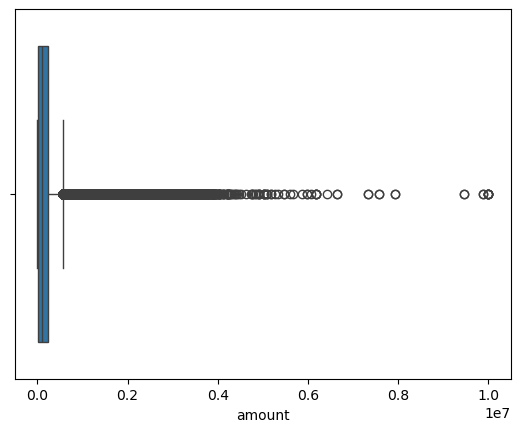

In [62]:
import seaborn as sns
sns.boxplot(x=financial2["amount"])


## data financial fraud datası olduğu için aykırı değerler fraudu gösteriyor olabilir bundan dolayı grafiksel olarak analiz etmek daha doğru

In [64]:
fraud_by_type = financial2[financial2['isFraud'] == 1].groupby('type').size()
print(fraud_by_type)


type
1    275
4    260
dtype: int64


In [65]:
financial2.shape

(886099, 11)

## ÖLÇEKLENDİRME

In [67]:
from sklearn.preprocessing import StandardScaler

scale_cols = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

scaler = StandardScaler()

financial2.loc[:, scale_cols] = scaler.fit_transform(financial2[scale_cols])


In [68]:
financial2

,nameOrig_converted,nameDest_converted,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,11231006815,21979787155,1,3,-0.629336,-0.260433,-0.267686,-0.459851,-0.499796,0,0
1,11666544295,22044282225,1,3,-0.658932,-0.307688,-0.311868,-0.459851,-0.499796,0,0
2,11305486145,1553264065,1,4,-0.665178,-0.314375,-0.317946,-0.459851,-0.499796,1,0
3,1840083671,138997010,1,1,-0.665178,-0.314375,-0.317946,-0.451099,-0.499796,1,0
4,12048537720,21230701703,1,3,-0.622550,-0.301244,-0.308576,-0.459851,-0.499796,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1000095,1717622073,11206457238,45,0,0.363910,1.815265,1.872986,-0.254487,-0.413433,0,0
1000096,11629214506,1362180320,45,0,-0.368766,1.903337,1.898087,3.079470,2.838489,0,0
1000097,11880367930,11747080965,45,0,-0.016758,1.928746,1.952930,-0.247532,-0.366457,0,0
1000098,11783404602,11479797936,45,0,-0.449542,1.984260,1.971207,-0.416556,-0.481505,0,0


In [69]:
from sklearn.preprocessing import MinMaxScaler

scale_cols = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

scaler = MinMaxScaler()

financial2.loc[:, scale_cols] = scaler.fit_transform(financial2[scale_cols])

In [70]:
financial2

,nameOrig_converted,nameDest_converted,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,11231006815,21979787155,1,3,0.000984,0.004369,0.004116,0.000000,0.000000,0,0
1,11666544295,22044282225,1,3,0.000186,0.000546,0.000498,0.000000,0.000000,0,0
2,11305486145,1553264065,1,4,0.000018,0.000005,0.000000,0.000000,0.000000,1,0
3,1840083671,138997010,1,1,0.000018,0.000005,0.000000,0.000504,0.000000,1,0
4,12048537720,21230701703,1,3,0.001167,0.001067,0.000767,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1000095,1717622073,11206457238,45,0,0.027749,0.172321,0.179416,0.011819,0.005206,0,0
1000096,11629214506,1362180320,45,0,0.008006,0.179447,0.181471,0.203685,0.201234,0,0
1000097,11880367930,11747080965,45,0,0.017491,0.181503,0.185963,0.012219,0.008038,0,0
1000098,11783404602,11479797936,45,0,0.005829,0.185995,0.187459,0.002492,0.001103,0,0


# JTRAİN JCV JTEST DATA BÖLÜMÜ

In [72]:
financial2

,nameOrig_converted,nameDest_converted,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,11231006815,21979787155,1,3,0.000984,0.004369,0.004116,0.000000,0.000000,0,0
1,11666544295,22044282225,1,3,0.000186,0.000546,0.000498,0.000000,0.000000,0,0
2,11305486145,1553264065,1,4,0.000018,0.000005,0.000000,0.000000,0.000000,1,0
3,1840083671,138997010,1,1,0.000018,0.000005,0.000000,0.000504,0.000000,1,0
4,12048537720,21230701703,1,3,0.001167,0.001067,0.000767,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1000095,1717622073,11206457238,45,0,0.027749,0.172321,0.179416,0.011819,0.005206,0,0
1000096,11629214506,1362180320,45,0,0.008006,0.179447,0.181471,0.203685,0.201234,0,0
1000097,11880367930,11747080965,45,0,0.017491,0.181503,0.185963,0.012219,0.008038,0,0
1000098,11783404602,11479797936,45,0,0.005829,0.185995,0.187459,0.002492,0.001103,0,0


In [73]:
from sklearn.model_selection import train_test_split

jtrain, jtest = train_test_split(financial2, test_size=0.2, random_state=42)

print("Train set:")
print(jtrain)
print("\nTest set:")
print(jtest)

Train set:
        nameOrig_converted  nameDest_converted  step  type    amount  \
623533          1134478396          1286228793    34     0  0.019401   
298676          1700156071          1875676505    15     1  0.004656   
45482          11894143720         11345585961     9     0  0.021096   
108727           155582325          1883481793    11     1  0.001608   
74527           1291289175         21105533532    10     3  0.000945   
...                    ...                 ...   ...   ...       ...   
291827          1627546383          1731789657    15     0  0.019426   
411539           162890776          1271215750    18     0  0.016846   
148357          1898744790          1699679818    12     1  0.048822   
756613         12071701492          2912534236    38     3  0.000131   
137020         11957854847         22091238496    11     3  0.000364   

        oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  \
623533       0.359782        0.364700        0.0055

# GÖRSELLEŞTİRME

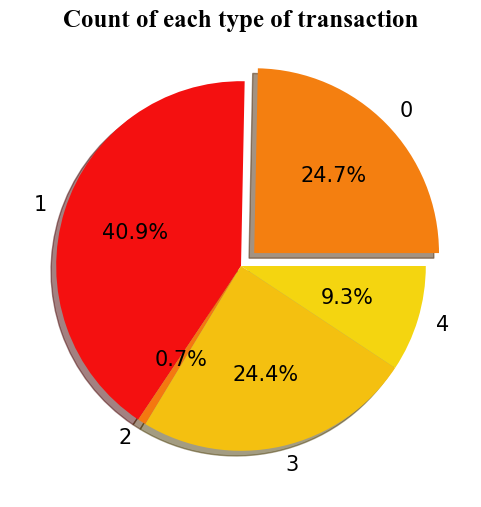

In [75]:
import matplotlib.pyplot as plt
financial2.groupby('type').count()['amount']
counts = financial2.groupby('type').count()['amount']
plt.figure(figsize = (6,6))
plt.pie(counts, labels = counts.index, autopct = "%1.1f%%", colors=['#F47F10', '#F41010', '#F47810', '#F4C010','#F4D510'], shadow = True,explode = (0.1, 0, 0, 0, 0),textprops={'fontsize': 15})
plt.title('Count of each type of transaction', fontweight = 'bold', fontsize = 18, fontfamily = 'times new roman')
plt.show()

### 'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4

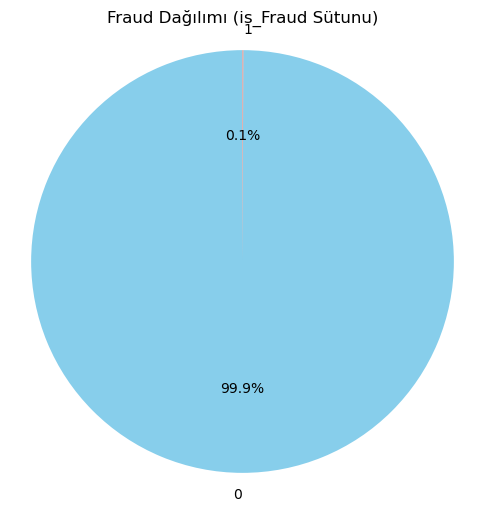

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

fraud_counts = financial2['isFraud'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Fraud Dağılımı (is_Fraud Sütunu)')
plt.axis('equal')  
plt.show()


In [78]:
financial2

,nameOrig_converted,nameDest_converted,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,11231006815,21979787155,1,3,0.000984,0.004369,0.004116,0.000000,0.000000,0,0
1,11666544295,22044282225,1,3,0.000186,0.000546,0.000498,0.000000,0.000000,0,0
2,11305486145,1553264065,1,4,0.000018,0.000005,0.000000,0.000000,0.000000,1,0
3,1840083671,138997010,1,1,0.000018,0.000005,0.000000,0.000504,0.000000,1,0
4,12048537720,21230701703,1,3,0.001167,0.001067,0.000767,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1000095,1717622073,11206457238,45,0,0.027749,0.172321,0.179416,0.011819,0.005206,0,0
1000096,11629214506,1362180320,45,0,0.008006,0.179447,0.181471,0.203685,0.201234,0,0
1000097,11880367930,11747080965,45,0,0.017491,0.181503,0.185963,0.012219,0.008038,0,0
1000098,11783404602,11479797936,45,0,0.005829,0.185995,0.187459,0.002492,0.001103,0,0


# 2. HAFTA FEATURE ENGINEERING

## FEATURE CREATION

In [81]:
financial2["daily_transaction_count"] = financial2.groupby("step")["amount"].transform("count")


In [82]:
financial2["change_in_balance_orig"] = financial2["oldbalanceOrg"] - financial2["newbalanceOrig"]
financial2["change_in_balance_dest"] = financial2["newbalanceDest"] - financial2["oldbalanceDest"]


In [83]:
financial2[ "is_balance_inconsistent"] = ~(
    (financial2["change_in_balance_orig"] == financial2["amount"]) &
    (financial2["change_in_balance_dest"] == financial2["amount"])
)


In [84]:
financial2[financial2["is_balance_inconsistent"] == True]

,nameOrig_converted,nameDest_converted,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,daily_transaction_count,change_in_balance_orig,change_in_balance_dest,is_balance_inconsistent
0,11231006815,21979787155,1,3,0.000984,0.004369,0.004116,0.000000,0.000000,0,0,2491,0.000253,0.000000,True
1,11666544295,22044282225,1,3,0.000186,0.000546,0.000498,0.000000,0.000000,0,0,2491,0.000048,0.000000,True
2,11305486145,1553264065,1,4,0.000018,0.000005,0.000000,0.000000,0.000000,1,0,2491,0.000005,0.000000,True
3,1840083671,138997010,1,1,0.000018,0.000005,0.000000,0.000504,0.000000,1,0,2491,0.000005,-0.000504,True
4,12048537720,21230701703,1,3,0.001167,0.001067,0.000767,0.000000,0.000000,0,0,2491,0.000300,0.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000095,1717622073,11206457238,45,0,0.027749,0.172321,0.179416,0.011819,0.005206,0,0,13946,-0.007095,-0.006613,True
1000096,11629214506,1362180320,45,0,0.008006,0.179447,0.181471,0.203685,0.201234,0,0,13946,-0.002024,-0.002451,True
1000097,11880367930,11747080965,45,0,0.017491,0.181503,0.185963,0.012219,0.008038,0,0,13946,-0.004459,-0.004181,True
1000098,11783404602,11479797936,45,0,0.005829,0.185995,0.187459,0.002492,0.001103,0,0,13946,-0.001464,-0.001389,True


In [85]:
financial2 ["transaction_to_balance_ratio"] = financial2["amount"] / financial2["oldbalanceOrg"].replace(0, np.nan)


In [86]:
financial2["is_high_risk_type"] = financial2["type"].isin([1, 4]).astype(int)


## FEATURE TRANSFORMATION

In [88]:
financial2 = financial2.astype({
    "is_balance_inconsistent": "int64",
    "is_high_risk_type": "int64"
})


In [89]:
financial2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 886099 entries, 0 to 1000099
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   nameOrig_converted            886099 non-null  int64  
 1   nameDest_converted            886099 non-null  int64  
 2   step                          886099 non-null  int64  
 3   type                          886099 non-null  int64  
 4   amount                        886099 non-null  float64
 5   oldbalanceOrg                 886099 non-null  float64
 6   newbalanceOrig                886099 non-null  float64
 7   oldbalanceDest                886099 non-null  float64
 8   newbalanceDest                886099 non-null  float64
 9   isFraud                       886099 non-null  int64  
 10  isFlaggedFraud                886099 non-null  int64  
 11  daily_transaction_count       886099 non-null  int64  
 12  change_in_balance_orig        886099 non-null  f

### Bu bölümde çarpıklık ve aykırı değer analizi yapılmas ve düzeltilmesi gerekirken çalışılan data fraud datası olduğuu için bu çarpıklığın düzeltilmesi doğru değildir. Çünkü bu değerler fraudu gösteriyor olabilir. Bundan dolayı log dönüşümü , karekök dönüşümü veyaa box-cox dönüşümü ile çarpıklık düzeltilmemiş bunun yerine çaprıklığın grafiğe dökülüp incelenmiştir. Ayrıca data encoding işlemi 1. haftada bazı sütunlar için (nameOrig_converted,nameDest_converted,type) yapılmış olup, 2. haftada yeni eklenen "is_balance_inconsistent ve is_high_risk_type" için encoding ve int64 formatına çevirilmiştir.


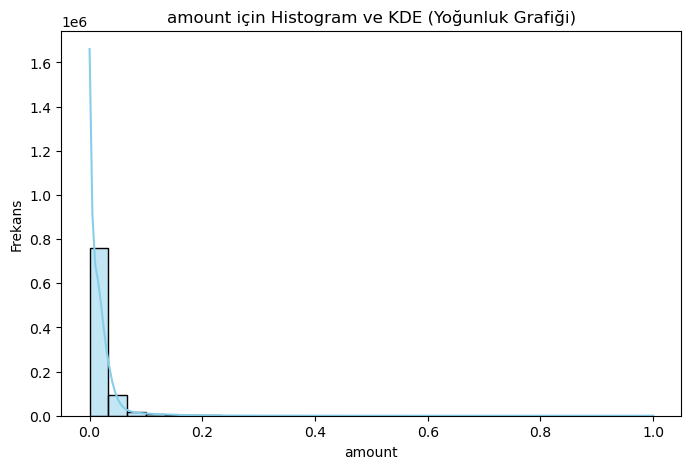

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt


sütun = "amount"  

plt.figure(figsize=(8, 5))
sns.histplot(financial2[sütun], kde=True, bins=30, color="skyblue")
plt.title(f"{sütun} için Histogram ve KDE (Yoğunluk Grafiği)")
plt.xlabel(sütun)
plt.ylabel("Frekans")
plt.show()


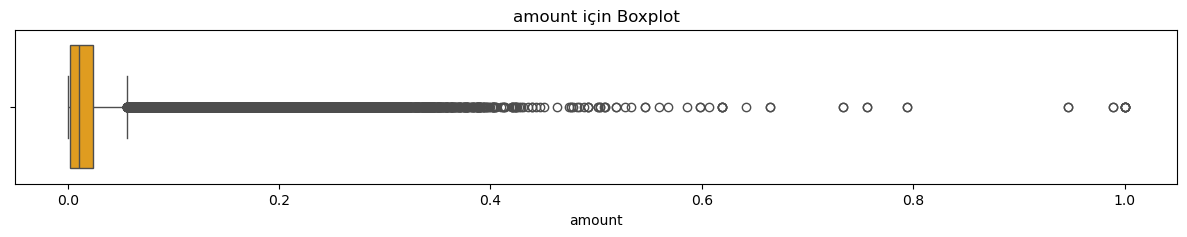

In [92]:
plt.figure(figsize=(15, 2))
sns.boxplot(x=financial2[sütun], color="orange")
plt.title(f"{sütun} için Boxplot")
plt.show()


In [93]:
skew_value = financial2[sütun].skew()
print(f"{sütun} sütununun çarpıklık değeri: {skew_value:.2f}")


amount sütununun çarpıklık değeri: 5.27


## FEATURE EXTRACTION

In [95]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
numeric_cols = financial2.select_dtypes(include=["int64", "float64"]).drop(columns=["isFraud"]).columns
X_numeric = financial2[numeric_cols]
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X_numeric)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["isFraud"] = financial2["isFraud"].reset_index(drop=True)
print(pca_df.head())
print(pca.explained_variance_ratio_)


        PC1       PC2  isFraud
0  0.100441 -1.821761        0
1  0.089150 -1.850189        0
2 -0.949407 -1.154204        1
3 -0.275933 -0.632904        1
4  0.055079 -1.823266        0
[0.19948399 0.16964303]


## FEATURE SELECTION

Seçilen Özellikler ve Korelasyonları:

change_in_balance_orig    0.192241
amount                    0.075374
Name: isFraud, dtype: float64


C:\Users\yusuf\AppData\Local\Temp\ipykernel_17364\269551169.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_features.values, y=selected_features.index, palette="coolwarm")


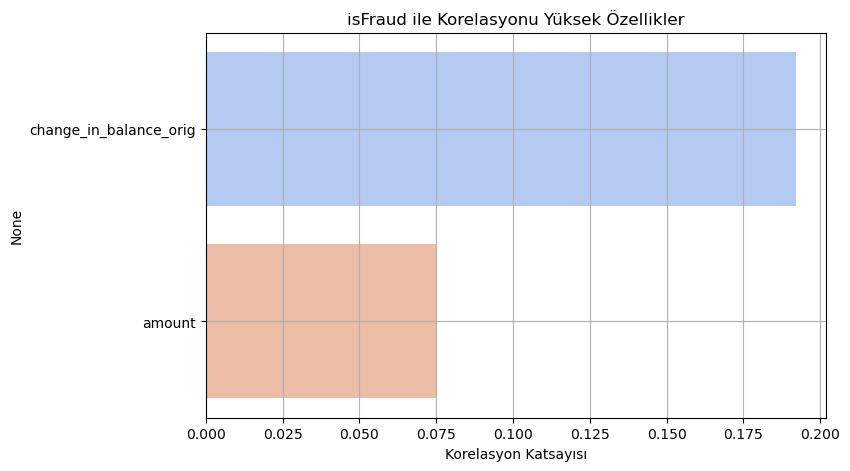

In [97]:
import matplotlib.pyplot as plt

numeric_cols = financial2.select_dtypes(include=["int64", "float64"]).columns

corr_matrix = financial2[numeric_cols].corr()

fraud_corr = corr_matrix["isFraud"].drop("isFraud").sort_values(key=lambda x: abs(x), ascending=False)

selected_features = fraud_corr[abs(fraud_corr) > 0.05]

print("Seçilen Özellikler ve Korelasyonları:\n")
print(selected_features)

plt.figure(figsize=(8, 5))
sns.barplot(x=selected_features.values, y=selected_features.index, palette="coolwarm")
plt.title("isFraud ile Korelasyonu Yüksek Özellikler")
plt.xlabel("Korelasyon Katsayısı")
plt.grid(True)
plt.show()


Seçilen Özellikler ve Korelasyonları:

Series([], Name: isFraud, dtype: float64)


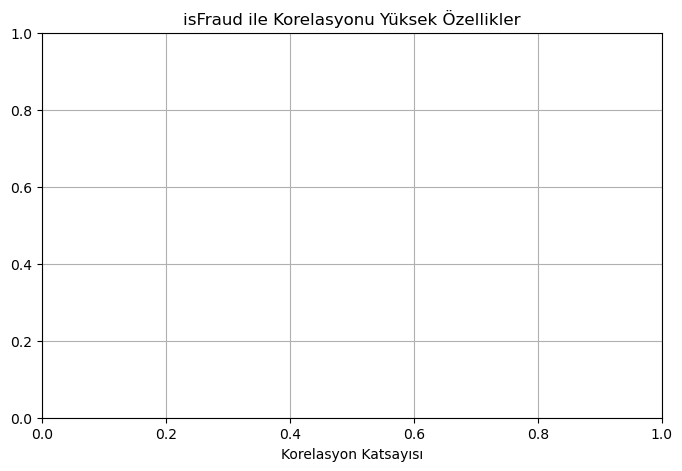

In [98]:
import matplotlib.pyplot as plt

numeric_cols = financial2.select_dtypes(include=["int64", "float64"]).columns

corr_matrix = financial2[numeric_cols].corr(method = "spearman")

fraud_corr = corr_matrix["isFraud"].drop("isFraud").sort_values(key=lambda x: abs(x), ascending=False)

selected_features = fraud_corr[abs(fraud_corr) > 0.05]

print("Seçilen Özellikler ve Korelasyonları:\n")
print(selected_features)

plt.figure(figsize=(8, 5))
sns.barplot(x=selected_features.values, y=selected_features.index, palette="coolwarm")
plt.title("isFraud ile Korelasyonu Yüksek Özellikler")
plt.xlabel("Korelasyon Katsayısı")
plt.grid(True)
plt.show()


## FEATURE SCAILING

In [100]:
from sklearn.preprocessing import MinMaxScaler

scale_cols = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "change_in_balance_orig", "change_in_balance_dest", "transaction_to_balance_ratio"]

scaler = MinMaxScaler()

financial2[scale_cols] = scaler.fit_transform(financial2[scale_cols])

In [101]:
from sklearn.preprocessing import StandardScaler

scale_cols = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "change_in_balance_orig", "change_in_balance_dest", "transaction_to_balance_ratio"]

scaler = StandardScaler()

financial2[scale_cols] = scaler.fit_transform(financial2[scale_cols])


In [102]:
financial2.dropna()

,nameOrig_converted,nameDest_converted,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,daily_transaction_count,change_in_balance_orig,change_in_balance_dest,is_balance_inconsistent,transaction_to_balance_ratio,is_high_risk_type
0,11231006815,21979787155,1,3,-0.629336,-0.260433,-0.267686,-0.459851,-0.499796,0,0,2491,0.255181,-0.286499,1,-0.044421,0
1,11666544295,22044282225,1,3,-0.658932,-0.307688,-0.311868,-0.459851,-0.499796,0,0,2491,0.193378,-0.286499,1,-0.044409,0
2,11305486145,1553264065,1,4,-0.665178,-0.314375,-0.317946,-0.459851,-0.499796,1,0,2491,0.180348,-0.286499,1,-0.044040,1
3,1840083671,138997010,1,1,-0.665178,-0.314375,-0.317946,-0.451099,-0.499796,1,0,2491,0.180348,-0.325884,1,-0.044040,1
4,12048537720,21230701703,1,3,-0.622550,-0.301244,-0.308576,-0.459851,-0.499796,0,0,2491,0.269130,-0.286499,1,-0.044331,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000095,1717622073,11206457238,45,0,0.363910,1.815265,1.872986,-0.254487,-0.413433,0,0,13946,-1.955306,-0.803562,1,-0.044428,0
1000096,11629214506,1362180320,45,0,-0.368766,1.903337,1.898087,3.079470,2.838489,0,0,13946,-0.429957,-0.478192,1,-0.044440,0
1000097,11880367930,11747080965,45,0,-0.016758,1.928746,1.952930,-0.247532,-0.366457,0,0,13946,-1.162509,-0.613434,1,-0.044435,0
1000098,11783404602,11479797936,45,0,-0.449542,1.984260,1.971207,-0.416556,-0.481505,0,0,13946,-0.261486,-0.395113,1,-0.044441,0


# 3.HAFTA

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = financial2.drop("isFraud", axis=1)
y = financial2["isFraud"]

imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


In [105]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print(" XGBoost Sonuçları")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))


C:\Users\yusuf\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:53:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 XGBoost Sonuçları
[[177021     92]
 [    60     47]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    177113
           1       0.34      0.44      0.38       107

    accuracy                           1.00    177220
   macro avg       0.67      0.72      0.69    177220
weighted avg       1.00      1.00      1.00    177220

Accuracy: 0.9991423089944701


In [106]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_xgb)

cm_df = pd.DataFrame(cm.T,  
                     index=["Tahmin 0", "Tahmin 1"], 
                     columns=["Gerçek 0", "Gerçek 1"])
print("🔹 XGBoost Confusion Matrix:")
print(cm_df)
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("🔹 Accuracy:", accuracy_score(y_test, y_pred_xgb))

C:\Users\yusuf\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:53:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔹 XGBoost Confusion Matrix:
          Gerçek 0  Gerçek 1
Tahmin 0    177021        60
Tahmin 1        92        47

🔹 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    177113
           1       0.34      0.44      0.38       107

    accuracy                           1.00    177220
   macro avg       0.67      0.72      0.69    177220
weighted avg       1.00      1.00      1.00    177220

🔹 Accuracy: 0.9991423089944701


In [107]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)

y_pred_cat = cat_model.predict(X_test)

print(" CatBoost Sonuçları")
print(confusion_matrix(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))
print("Accuracy:", accuracy_score(y_test, y_pred_cat))


 CatBoost Sonuçları
[[177105      8]
 [    19     88]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    177113
           1       0.92      0.82      0.87       107

    accuracy                           1.00    177220
   macro avg       0.96      0.91      0.93    177220
weighted avg       1.00      1.00      1.00    177220

Accuracy: 0.9998476469924388


In [108]:
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_cat)
cm_df = pd.DataFrame(cm.T,  
                     index=["Tahmin 0", "Tahmin 1"], 
                     columns=["Gerçek 0", "Gerçek 1"])
print("🔹 CatBoost Confusion Matrix:")
print(cm_df)
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred_cat))
print("🔹 Accuracy:", accuracy_score(y_test, y_pred_cat))


🔹 CatBoost Confusion Matrix:
          Gerçek 0  Gerçek 1
Tahmin 0    177105        19
Tahmin 1         8        88

🔹 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    177113
           1       0.92      0.82      0.87       107

    accuracy                           1.00    177220
   macro avg       0.96      0.91      0.93    177220
weighted avg       1.00      1.00      1.00    177220

🔹 Accuracy: 0.9998476469924388


In [109]:
financial2[financial2["is_balance_inconsistent"] == 1]


,nameOrig_converted,nameDest_converted,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,daily_transaction_count,change_in_balance_orig,change_in_balance_dest,is_balance_inconsistent,transaction_to_balance_ratio,is_high_risk_type
0,11231006815,21979787155,1,3,-0.629336,-0.260433,-0.267686,-0.459851,-0.499796,0,0,2491,0.255181,-0.286499,1,-0.044421,0
1,11666544295,22044282225,1,3,-0.658932,-0.307688,-0.311868,-0.459851,-0.499796,0,0,2491,0.193378,-0.286499,1,-0.044409,0
2,11305486145,1553264065,1,4,-0.665178,-0.314375,-0.317946,-0.459851,-0.499796,1,0,2491,0.180348,-0.286499,1,-0.044040,1
3,1840083671,138997010,1,1,-0.665178,-0.314375,-0.317946,-0.451099,-0.499796,1,0,2491,0.180348,-0.325884,1,-0.044040,1
4,12048537720,21230701703,1,3,-0.622550,-0.301244,-0.308576,-0.459851,-0.499796,0,0,2491,0.269130,-0.286499,1,-0.044331,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000095,1717622073,11206457238,45,0,0.363910,1.815265,1.872986,-0.254487,-0.413433,0,0,13946,-1.955306,-0.803562,1,-0.044428,0
1000096,11629214506,1362180320,45,0,-0.368766,1.903337,1.898087,3.079470,2.838489,0,0,13946,-0.429957,-0.478192,1,-0.044440,0
1000097,11880367930,11747080965,45,0,-0.016758,1.928746,1.952930,-0.247532,-0.366457,0,0,13946,-1.162509,-0.613434,1,-0.044435,0
1000098,11783404602,11479797936,45,0,-0.449542,1.984260,1.971207,-0.416556,-0.481505,0,0,13946,-0.261486,-0.395113,1,-0.044441,0


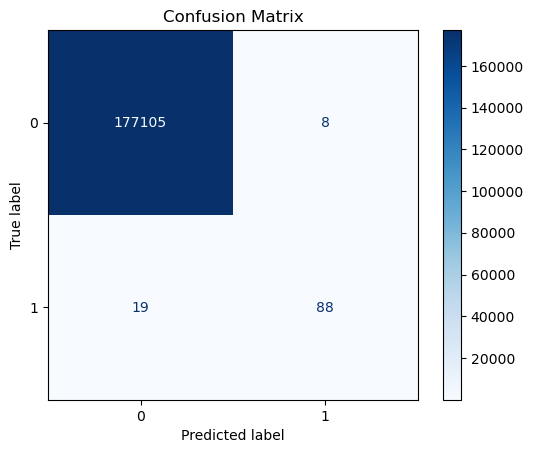

In [110]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_cat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [111]:
financial2

,nameOrig_converted,nameDest_converted,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,daily_transaction_count,change_in_balance_orig,change_in_balance_dest,is_balance_inconsistent,transaction_to_balance_ratio,is_high_risk_type
0,11231006815,21979787155,1,3,-0.629336,-0.260433,-0.267686,-0.459851,-0.499796,0,0,2491,0.255181,-0.286499,1,-0.044421,0
1,11666544295,22044282225,1,3,-0.658932,-0.307688,-0.311868,-0.459851,-0.499796,0,0,2491,0.193378,-0.286499,1,-0.044409,0
2,11305486145,1553264065,1,4,-0.665178,-0.314375,-0.317946,-0.459851,-0.499796,1,0,2491,0.180348,-0.286499,1,-0.044040,1
3,1840083671,138997010,1,1,-0.665178,-0.314375,-0.317946,-0.451099,-0.499796,1,0,2491,0.180348,-0.325884,1,-0.044040,1
4,12048537720,21230701703,1,3,-0.622550,-0.301244,-0.308576,-0.459851,-0.499796,0,0,2491,0.269130,-0.286499,1,-0.044331,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000095,1717622073,11206457238,45,0,0.363910,1.815265,1.872986,-0.254487,-0.413433,0,0,13946,-1.955306,-0.803562,1,-0.044428,0
1000096,11629214506,1362180320,45,0,-0.368766,1.903337,1.898087,3.079470,2.838489,0,0,13946,-0.429957,-0.478192,1,-0.044440,0
1000097,11880367930,11747080965,45,0,-0.016758,1.928746,1.952930,-0.247532,-0.366457,0,0,13946,-1.162509,-0.613434,1,-0.044435,0
1000098,11783404602,11479797936,45,0,-0.449542,1.984260,1.971207,-0.416556,-0.481505,0,0,13946,-0.261486,-0.395113,1,-0.044441,0


## NORMALLİK TESTİ

In [113]:
from scipy.stats import jarque_bera
for column in financial2.select_dtypes(include=['int64', 'float64']).columns:
    jb_stat, p = jarque_bera(financial2[column].dropna())
    result = 'Normal Dağılım' if p > 0.05 else 'Normal Dağılım DEĞİL'
    print(f"{column}: JB={jb_stat:.2f}, p={p:.4f} → {result}")


nameOrig_converted: JB=143516.68, p=0.0000 → Normal Dağılım DEĞİL
nameDest_converted: JB=69391.59, p=0.0000 → Normal Dağılım DEĞİL
step: JB=97019.62, p=0.0000 → Normal Dağılım DEĞİL
type: JB=86879.54, p=0.0000 → Normal Dağılım DEĞİL
amount: JB=133458641.65, p=0.0000 → Normal Dağılım DEĞİL
oldbalanceOrg: JB=29967486.31, p=0.0000 → Normal Dağılım DEĞİL
newbalanceOrig: JB=28584872.39, p=0.0000 → Normal Dağılım DEĞİL
oldbalanceDest: JB=57231270.07, p=0.0000 → Normal Dağılım DEĞİL
newbalanceDest: JB=44748958.56, p=0.0000 → Normal Dağılım DEĞİL
isFraud: JB=100914640185.63, p=0.0000 → Normal Dağılım DEĞİL
isFlaggedFraud: JB=nan, p=nan → Normal Dağılım DEĞİL
daily_transaction_count: JB=316530.06, p=0.0000 → Normal Dağılım DEĞİL
change_in_balance_orig: JB=12154168393.03, p=0.0000 → Normal Dağılım DEĞİL
change_in_balance_dest: JB=7241166076.75, p=0.0000 → Normal Dağılım DEĞİL
is_balance_inconsistent: JB=nan, p=nan → Normal Dağılım DEĞİL
transaction_to_balance_ratio: JB=4267938779749.13, p=0.0000

## SPEARMAN KORELASYON

In [115]:
from scipy.stats import spearmanr
x = financial2['amount'].dropna()
y = financial2['oldbalanceOrg'].dropna()
common_index = x.index.intersection(y.index)
x_clean = x.loc[common_index]
y_clean = y.loc[common_index]

corr, p_value = spearmanr(x_clean, y_clean)
print(f"Spearman korelasyon: {corr:.4f}, p-değeri: {p_value:.4f}")


Spearman korelasyon: -0.1496, p-değeri: 0.0000


## MANN WHITNEY U TESTİ

In [117]:
from scipy.stats import mannwhitneyu
group0 = financial2.loc[financial2['isFraud'] == 0, 'amount'].dropna()
group1 = financial2.loc[financial2['isFraud'] == 1, 'amount'].dropna()

stat, p_value = mannwhitneyu(group0, group1, alternative='two-sided')
print(f"Mann-Whitney U testi istatistiği: {stat:.4f}, p-değeri: {p_value:.4f}")


Mann-Whitney U testi istatistiği: 161304211.0000, p-değeri: 0.0000


In [118]:
from scipy.stats import mannwhitneyu
group0 = financial2.loc[financial2['isFraud'] == 0, 'daily_transaction_count'].dropna()
group1 = financial2.loc[financial2['isFraud'] == 1, 'daily_transaction_count'].dropna()

stat, p_value = mannwhitneyu(group0, group1, alternative='two-sided')
print(f"Mann-Whitney U testi istatistiği: {stat:.4f}, p-değeri: {p_value:.4f}")


Mann-Whitney U testi istatistiği: 334190379.0000, p-değeri: 0.0000


In [119]:
from scipy.stats import mannwhitneyu
group0 = financial2.loc[financial2['isFraud'] == 0, 'change_in_balance_dest'].dropna()
group1 = financial2.loc[financial2['isFraud'] == 1, 'change_in_balance_dest'].dropna()

stat, p_value = mannwhitneyu(group0, group1, alternative='two-sided')
print(f"Mann-Whitney U testi istatistiği: {stat:.4f}, p-değeri: {p_value:.4f}")


Mann-Whitney U testi istatistiği: 203526313.0000, p-değeri: 0.0000


##### İncelendiğinde h0 hipotezi medyanlarının aynı olduğu , h1 ise medyanlarının farklı olduğunu göstermektedir. üç örnektede p değeri 0.05ten k,çük h0 red edilir. Bunun sonucunda amount,change_in_balance_dest,daily_transaction_count değerleri dolandırıcılık işlemi ile ilgili olabilir.

## KRUSKAL WALLIS TESTİ

In [122]:
from scipy.stats import kruskal
groups = []
for t in financial2['type'].unique():
    group = financial2.loc[financial2['type'] == t, 'amount'].dropna()
    groups.append(group)
stat, p_value = kruskal(*groups)
print(f"Kruskal-Wallis testi istatistiği: {stat:.4f}, p-değeri: {p_value:.4f}")


Kruskal-Wallis testi istatistiği: 480094.0036, p-değeri: 0.0000


##### h0 hipotezi type kategorisinde amount değerlerinin dağılımları aynıdır. h1 dağılımlarfarklıdır. h1 hipotezi kabul edilmiştir.

## Kİ KARE BAĞIMSIZLIK TESTİ

In [125]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(financial2["type"], financial2["isFraud"])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print("Ki-Kare İstatistiği:", chi2_stat)
print("Serbestlik Derecesi:", dof)
print("p-değeri:", p_val)
if p_val < 0.05:
    print("Sonuç: 'type' ile 'isFraud' arasında İSTATİSTİKSEL OLARAK ANLAMLI bir ilişki vardır.")
else:
    print("Sonuç: 'type' ile 'isFraud' arasında anlamlı bir ilişki YOKTUR.")


Ki-Kare İstatistiği: 1169.4607993623172
Serbestlik Derecesi: 4
p-değeri: 6.64525700755569e-252
Sonuç: 'type' ile 'isFraud' arasında İSTATİSTİKSEL OLARAK ANLAMLI bir ilişki vardır.
